In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_excel('[Dataset]_(Viral_Konten_MedSos).xlsx')

# Display the first few rows of the dataset
df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Missing values per column:
 Series([], dtype: int64)


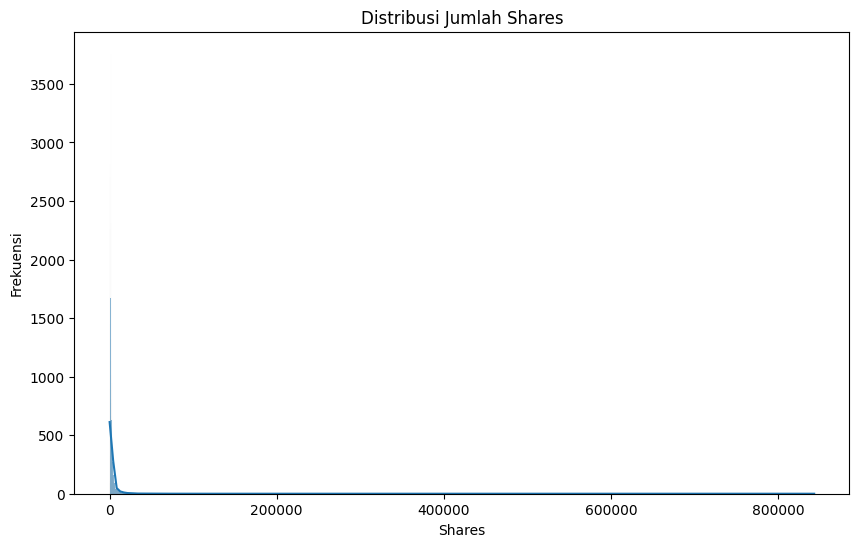

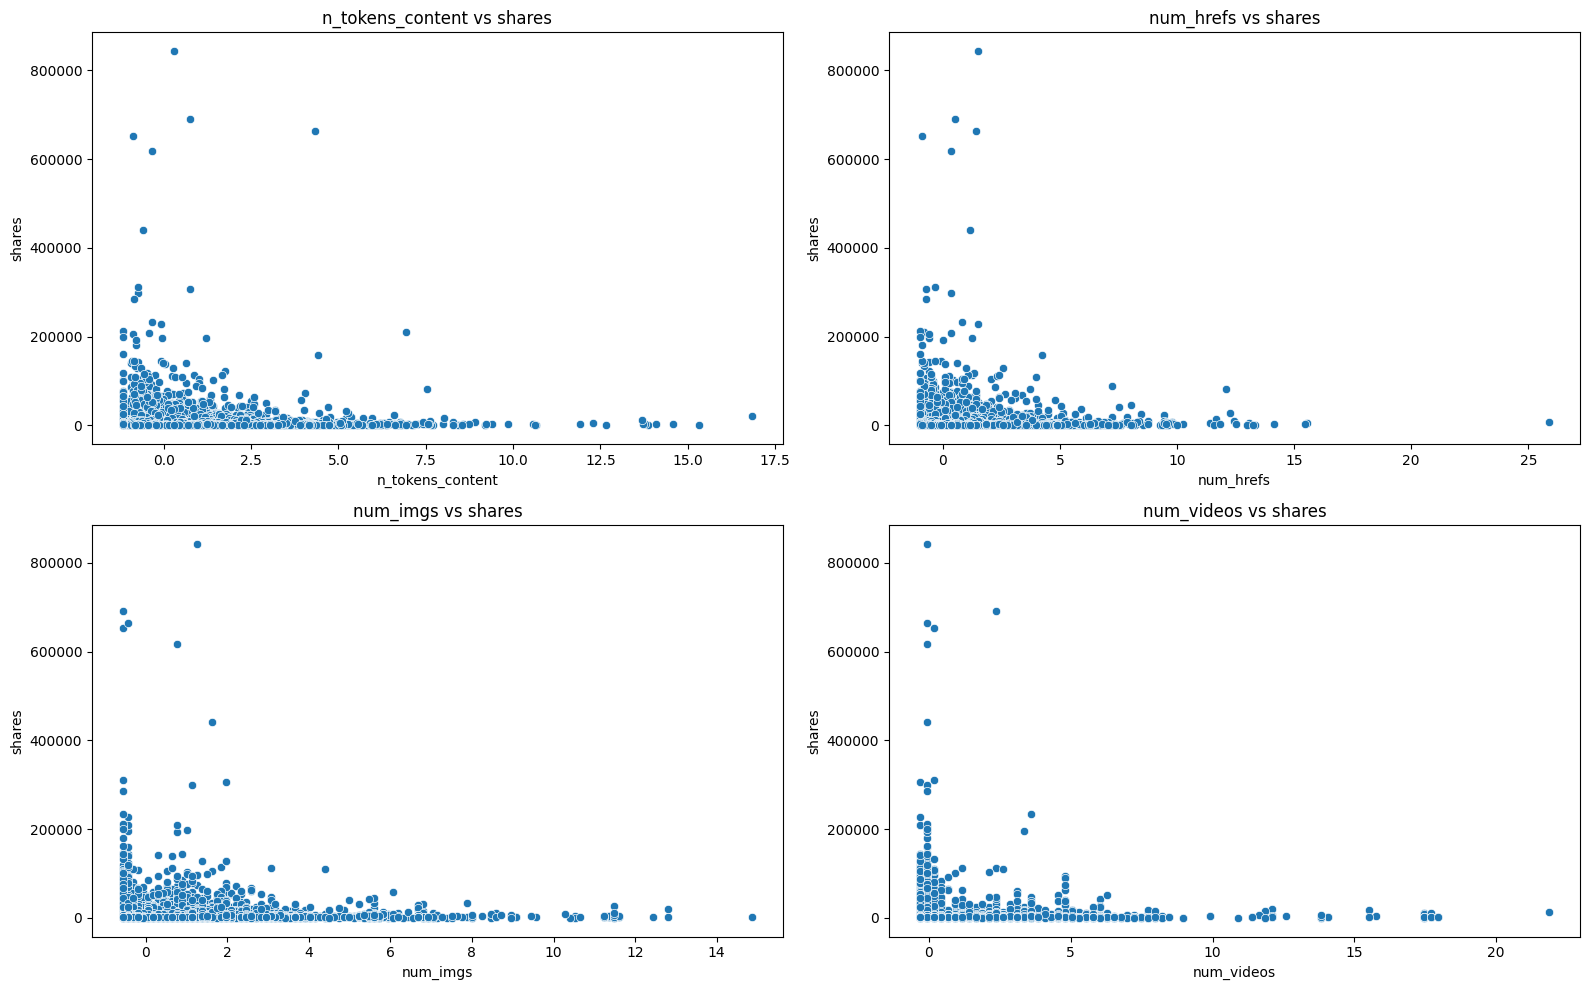

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Pembersihan Data
# Hapus kolom yang tidak perlu
df.columns = df.columns.str.strip()
df_cleaned = df.drop(['url'], axis=1)

# Periksa nilai yang hilang
missing_values = df_cleaned.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

# Jika ada nilai yang hilang, tangani (misalnya dengan mengisi atau menghapus)
# df_cleaned = df_cleaned.dropna()

# 2. Normalisasi Data
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Normalisasi fitur numerik (kecuali target 'shares')
features = df_cleaned.drop('shares', axis=1)
features_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Tambahkan kembali kolom target 'shares'
df_scaled['shares'] = df_cleaned['shares'].values

# 3. Distribusi Data
# Visualisasi distribusi dari variabel target 'shares'
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['shares'], kde=True)
plt.title('Distribusi Jumlah Shares')
plt.xlabel('Shares')
plt.ylabel('Frekuensi')
plt.show()

# 4. Visualisasi Data
# Visualisasi beberapa fitur utama
plt.figure(figsize=(16, 10))

# Plot hubungan antara 'n_tokens_content' dan 'shares'
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_scaled['n_tokens_content'], y=df_scaled['shares'])
plt.title('n_tokens_content vs shares')

# Plot hubungan antara 'num_hrefs' dan 'shares'
plt.subplot(2, 2, 2)
sns.scatterplot(x=df_scaled['num_hrefs'], y=df_scaled['shares'])
plt.title('num_hrefs vs shares')

# Plot hubungan antara 'num_imgs' dan 'shares'
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_scaled['num_imgs'], y=df_scaled['shares'])
plt.title('num_imgs vs shares')

# Plot hubungan antara 'num_videos' dan 'shares'
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_scaled['num_videos'], y=df_scaled['shares'])
plt.title('num_videos vs shares')

plt.tight_layout()
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# Pisahkan fitur dan label
X = df_scaled.drop('shares', axis=1)
y = df_scaled['shares']

# Binarize the target variable (e.g., shares >= 1400 is considered viral, else not viral)
threshold = 1400
y = (y >= threshold).astype(int)

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Uji Coba Model Menggunakan Data Uji
# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Classification Report:\n{report}')



Confusion Matrix:
 [[3774    0]
 [   0 4155]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3774
           1       1.00      1.00      1.00      4155

    accuracy                           1.00      7929
   macro avg       1.00      1.00      1.00      7929
weighted avg       1.00      1.00      1.00      7929



In [13]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# Pisahkan fitur dan label
X = df_cleaned.drop('shares', axis=1)
y = df_cleaned['shares']

# Binarize the target variable (e.g., shares >= 1400 is considered viral, else not viral)
threshold = 1400
y = (y >= threshold).astype(int)

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Classification Report:\n{report}')


Confusion Matrix:
 [[2257 1517]
 [1141 3014]]
Accuracy: 0.66
Precision: 0.67
Recall: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      3774
           1       0.67      0.73      0.69      4155

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



In [29]:
# Contoh data baru
new_data = pd.DataFrame({
    'timedelta': [500, 600],
    'n_tokens_title': [12, 8],
    'n_tokens_content': [350, 200],
    'n_unique_tokens': [0.5, 0.6],
    'n_non_stop_words': [1.0, 1.0],
    'n_non_stop_unique_tokens': [0.8, 0.7],
    'num_hrefs': [10, 5],
    'num_self_hrefs': [2, 1],
    'num_imgs': [1, 3],
    'num_videos': [1, 0],
    'average_token_length': [4.5, 4.0],
    'num_keywords': [7, 5],
    'data_channel_is_lifestyle': [1, 0],
    'data_channel_is_entertainment': [0, 1],
    'data_channel_is_bus': [0, 0],
    'data_channel_is_socmed': [0, 0],
    'data_channel_is_tech': [0, 1],
    'data_channel_is_world': [0, 0],
    'kw_min_min': [0, 0],
    'kw_max_min': [20, 50],
    'kw_avg_min': [10, 30],
    'kw_min_max': [100, 200],
    'kw_max_max': [500, 600],
    'kw_avg_max': [300, 400],
    'kw_min_avg': [50, 100],
    'kw_max_avg': [200, 300],
    'kw_avg_avg': [150, 200],
    'self_reference_min_shares': [100, 150],
    'self_reference_max_shares': [200, 300],
    'self_reference_avg_sharess': [150, 250],
    'weekday_is_monday': [0, 1],
    'weekday_is_tuesday': [0, 0],
    'weekday_is_wednesday': [0, 0],
    'weekday_is_thursday': [0, 0],
    'weekday_is_friday': [0, 0],
    'weekday_is_saturday': [0, 0],
    'weekday_is_sunday': [1, 0],
    'is_weekend': [1, 0],
    'LDA_00': [0.1, 0.2],
    'LDA_01': [0.2, 0.1],
    'LDA_02': [0.3, 0.4],
    'LDA_03': [0.2, 0.2],
    'LDA_04': [0.2, 0.1],
    'global_subjectivity': [0.5, 0.6],
    'global_sentiment_polarity': [0.1, 0.2],
    'global_rate_positive_words': [0.05, 0.06],
    'global_rate_negative_words': [0.02, 0.01],
    'rate_positive_words': [0.6, 0.7],
    'rate_negative_words': [0.1, 0.2],
    'avg_positive_polarity': [0.2, 0.3],
    'min_positive_polarity': [0.1, 0.2],
    'max_positive_polarity': [0.7, 0.8],
    'avg_negative_polarity': [-0.2, -0.3],
    'min_negative_polarity': [-0.5, -0.4],
    'max_negative_polarity': [-0.1, -0.2],
    'title_subjectivity': [0.5, 0.6],
    'title_sentiment_polarity': [0.1, 0.2],
    'abs_title_subjectivity': [0.1, 0.2],
    'abs_title_sentiment_polarity': [0.1, 0.2]
})

# Normalisasi data baru
new_data_scaled = scaler.transform(new_data)

# Prediksi apakah konten baru akan viral
predictions = model.predict(new_data_scaled)
results = ["Viral" if pred == 1 else "Tidak Viral" for pred in predictions]

# Tampilkan hasil prediksi
for i, result in enumerate(results):
    print(f"Konten {i+1}: {result}")


Konten 1: Viral
Konten 2: Tidak Viral


In [22]:
# import streamlit as st
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler

# # Load and prepare data (this should match the preprocessing steps above)
# # In a real-world application, you would load your pre-trained model and scaler
# file_path = '[Dataset]_(Viral_Konten_MedSos).xlsx'
# df = pd.read_excel(file_path)
# df.columns = df.columns.str.strip()
# df_cleaned = df.drop(['url'], axis=1)

# # Preprocess the data
# scaler = StandardScaler()
# features = df_cleaned.drop('shares', axis=1)
# features_scaled = scaler.fit_transform(features)
# df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
# df_scaled['shares'] = df_cleaned['shares'].values

# # Binarize the target variable (e.g., shares >= 1400 is considered viral, else not viral)
# threshold = 1400
# df_scaled['viral'] = (df_scaled['shares'] >= threshold).astype(int)

# # Split data into training and testing sets
# X = df_scaled.drop(['shares', 'viral'], axis=1)
# y = df_scaled['viral']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Define Streamlit app
# st.title("Prediksi Konten Media Sosial Akan Viral atau Tidak")

# # Define input fields for all features
# input_data = {}
# for feature in X.columns:
#     input_data[feature] = st.number_input(f"{feature.replace('_', ' ').title()}", min_value=0.0)

# # Convert input data to dataframe
# input_data_df = pd.DataFrame([input_data])

# # Preprocess the input data
# input_data_scaled = scaler.transform(input_data_df)

# # Make prediction
# prediction = model.predict(input_data_scaled)
# result = "Viral" if prediction[0] == 1 else "Tidak Viral"

# st.write(f"Hasil Prediksi: {result}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
